# Music

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import music21 # must import before fastai. otherwise stream.show() encounters elementtree error
from fastai.text import *

In [3]:
from fastai_data import MusicTokenizer
from encode_data import *
from midi_data import *

In [4]:
# c = music21.corpus.parse(music21.corpus.chorales.Iterator(returnType='filename')[55]) c.show()

In [5]:
path = Path('data/midi/midi_transcribe_v3_shortdur/')
path.ls()[:5]

[PosixPath('data/midi/midi_transcribe_v3_shortdur/ecomp'),
 PosixPath('data/midi/midi_transcribe_v3_shortdur/classic_piano'),
 PosixPath('data/midi/midi_transcribe_v3_shortdur/wikifonia'),
 PosixPath('data/midi/midi_transcribe_v3_shortdur/cprato'),
 PosixPath('data/midi/midi_transcribe_v3_shortdur/tmp_pop')]

In [7]:
model_path = 'tmp_clc_v3_gpt_5'

https://hpml2018.github.io/HPML2018_1.pdf

This paper suggests linear scaling rule does not work with RNNs. 3e-3 seems to be the magical number for 2k-8k

However, they didn't use schedule warmup, so I doubt they optimized the learning rate enough

In [8]:
bs=256
bptt=250

In [9]:
data = TextLMDataBunch.load(path, cache_name='tmp_clc', bs=bs, bptt=bptt)
data.valid_ds.x.processor[0] = TokenizeProcessor(tokenizer=MusicTokenizer())
t = data.train_ds[0][0]
t.text[:50], t.data

('xxbos || t0 nG3 t4 nB3 t4 nD4 t4 nD5 t2 nG5 t4 || ',
 array([ 2,  9, 12, 16, ..., 23,  8, 14,  8]))

### Load Learner

In [10]:
learn = language_model_learner(data, drop_mult=1, clip=.2, bptt=bptt)
learn = learn.load(model_path)

RuntimeError: Error(s) in loading state_dict for SequentialRNN:
	Missing key(s) in state_dict: "0.encoder.weight", "0.encoder_dp.emb.weight", "0.rnns.0.weight_hh_l0_raw", "0.rnns.0.module.weight_ih_l0", "0.rnns.0.module.weight_hh_l0", "0.rnns.0.module.bias_ih_l0", "0.rnns.0.module.bias_hh_l0", "0.rnns.1.weight_hh_l0_raw", "0.rnns.1.module.weight_ih_l0", "0.rnns.1.module.weight_hh_l0", "0.rnns.1.module.bias_ih_l0", "0.rnns.1.module.bias_hh_l0", "0.rnns.2.weight_hh_l0_raw", "0.rnns.2.module.weight_ih_l0", "0.rnns.2.module.weight_hh_l0", "0.rnns.2.module.bias_ih_l0", "0.rnns.2.module.bias_hh_l0", "1.decoder.weight", "1.decoder.bias". 
	Unexpected key(s) in state_dict: "transformer.embed.weight", "transformer.embed_pos.weight", "transformer.h.0.attn.b", "transformer.h.0.attn.c_attn.weight", "transformer.h.0.attn.c_attn.bias", "transformer.h.0.attn.c_proj.weight", "transformer.h.0.attn.c_proj.bias", "transformer.h.0.ln_1.weight", "transformer.h.0.ln_1.bias", "transformer.h.0.mlp.c_fc.weight", "transformer.h.0.mlp.c_fc.bias", "transformer.h.0.mlp.c_proj.weight", "transformer.h.0.mlp.c_proj.bias", "transformer.h.0.ln_2.weight", "transformer.h.0.ln_2.bias", "transformer.h.1.attn.b", "transformer.h.1.attn.c_attn.weight", "transformer.h.1.attn.c_attn.bias", "transformer.h.1.attn.c_proj.weight", "transformer.h.1.attn.c_proj.bias", "transformer.h.1.ln_1.weight", "transformer.h.1.ln_1.bias", "transformer.h.1.mlp.c_fc.weight", "transformer.h.1.mlp.c_fc.bias", "transformer.h.1.mlp.c_proj.weight", "transformer.h.1.mlp.c_proj.bias", "transformer.h.1.ln_2.weight", "transformer.h.1.ln_2.bias", "transformer.h.2.attn.b", "transformer.h.2.attn.c_attn.weight", "transformer.h.2.attn.c_attn.bias", "transformer.h.2.attn.c_proj.weight", "transformer.h.2.attn.c_proj.bias", "transformer.h.2.ln_1.weight", "transformer.h.2.ln_1.bias", "transformer.h.2.mlp.c_fc.weight", "transformer.h.2.mlp.c_fc.bias", "transformer.h.2.mlp.c_proj.weight", "transformer.h.2.mlp.c_proj.bias", "transformer.h.2.ln_2.weight", "transformer.h.2.ln_2.bias", "transformer.h.3.attn.b", "transformer.h.3.attn.c_attn.weight", "transformer.h.3.attn.c_attn.bias", "transformer.h.3.attn.c_proj.weight", "transformer.h.3.attn.c_proj.bias", "transformer.h.3.ln_1.weight", "transformer.h.3.ln_1.bias", "transformer.h.3.mlp.c_fc.weight", "transformer.h.3.mlp.c_fc.bias", "transformer.h.3.mlp.c_proj.weight", "transformer.h.3.mlp.c_proj.bias", "transformer.h.3.ln_2.weight", "transformer.h.3.ln_2.bias", "transformer.h.4.attn.b", "transformer.h.4.attn.c_attn.weight", "transformer.h.4.attn.c_attn.bias", "transformer.h.4.attn.c_proj.weight", "transformer.h.4.attn.c_proj.bias", "transformer.h.4.ln_1.weight", "transformer.h.4.ln_1.bias", "transformer.h.4.mlp.c_fc.weight", "transformer.h.4.mlp.c_fc.bias", "transformer.h.4.mlp.c_proj.weight", "transformer.h.4.mlp.c_proj.bias", "transformer.h.4.ln_2.weight", "transformer.h.4.ln_2.bias", "transformer.h.5.attn.b", "transformer.h.5.attn.c_attn.weight", "transformer.h.5.attn.c_attn.bias", "transformer.h.5.attn.c_proj.weight", "transformer.h.5.attn.c_proj.bias", "transformer.h.5.ln_1.weight", "transformer.h.5.ln_1.bias", "transformer.h.5.mlp.c_fc.weight", "transformer.h.5.mlp.c_fc.bias", "transformer.h.5.mlp.c_proj.weight", "transformer.h.5.mlp.c_proj.bias", "transformer.h.5.ln_2.weight", "transformer.h.5.ln_2.bias", "transformer.h.6.attn.b", "transformer.h.6.attn.c_attn.weight", "transformer.h.6.attn.c_attn.bias", "transformer.h.6.attn.c_proj.weight", "transformer.h.6.attn.c_proj.bias", "transformer.h.6.ln_1.weight", "transformer.h.6.ln_1.bias", "transformer.h.6.mlp.c_fc.weight", "transformer.h.6.mlp.c_fc.bias", "transformer.h.6.mlp.c_proj.weight", "transformer.h.6.mlp.c_proj.bias", "transformer.h.6.ln_2.weight", "transformer.h.6.ln_2.bias", "transformer.h.7.attn.b", "transformer.h.7.attn.c_attn.weight", "transformer.h.7.attn.c_attn.bias", "transformer.h.7.attn.c_proj.weight", "transformer.h.7.attn.c_proj.bias", "transformer.h.7.ln_1.weight", "transformer.h.7.ln_1.bias", "transformer.h.7.mlp.c_fc.weight", "transformer.h.7.mlp.c_fc.bias", "transformer.h.7.mlp.c_proj.weight", "transformer.h.7.mlp.c_proj.bias", "transformer.h.7.ln_2.weight", "transformer.h.7.ln_2.bias", "transformer.h.8.attn.b", "transformer.h.8.attn.c_attn.weight", "transformer.h.8.attn.c_attn.bias", "transformer.h.8.attn.c_proj.weight", "transformer.h.8.attn.c_proj.bias", "transformer.h.8.ln_1.weight", "transformer.h.8.ln_1.bias", "transformer.h.8.mlp.c_fc.weight", "transformer.h.8.mlp.c_fc.bias", "transformer.h.8.mlp.c_proj.weight", "transformer.h.8.mlp.c_proj.bias", "transformer.h.8.ln_2.weight", "transformer.h.8.ln_2.bias", "transformer.h.9.attn.b", "transformer.h.9.attn.c_attn.weight", "transformer.h.9.attn.c_attn.bias", "transformer.h.9.attn.c_proj.weight", "transformer.h.9.attn.c_proj.bias", "transformer.h.9.ln_1.weight", "transformer.h.9.ln_1.bias", "transformer.h.9.mlp.c_fc.weight", "transformer.h.9.mlp.c_fc.bias", "transformer.h.9.mlp.c_proj.weight", "transformer.h.9.mlp.c_proj.bias", "transformer.h.9.ln_2.weight", "transformer.h.9.ln_2.bias", "transformer.h.10.attn.b", "transformer.h.10.attn.c_attn.weight", "transformer.h.10.attn.c_attn.bias", "transformer.h.10.attn.c_proj.weight", "transformer.h.10.attn.c_proj.bias", "transformer.h.10.ln_1.weight", "transformer.h.10.ln_1.bias", "transformer.h.10.mlp.c_fc.weight", "transformer.h.10.mlp.c_fc.bias", "transformer.h.10.mlp.c_proj.weight", "transformer.h.10.mlp.c_proj.bias", "transformer.h.10.ln_2.weight", "transformer.h.10.ln_2.bias", "transformer.h.11.attn.b", "transformer.h.11.attn.c_attn.weight", "transformer.h.11.attn.c_attn.bias", "transformer.h.11.attn.c_proj.weight", "transformer.h.11.attn.c_proj.bias", "transformer.h.11.ln_1.weight", "transformer.h.11.ln_1.bias", "transformer.h.11.mlp.c_fc.weight", "transformer.h.11.mlp.c_fc.bias", "transformer.h.11.mlp.c_proj.weight", "transformer.h.11.mlp.c_proj.bias", "transformer.h.11.ln_2.weight", "transformer.h.11.ln_2.bias", "lm_head.decoder.weight". 

## Done

In [ ]:
out = learn.pred_batch()

In [ ]:
learn.show_results(rows=5, max_len=25)

In [12]:
idx = 5
seed_len = 200
files = get_files(path/'classic_piano', recurse=True)
file = files[idx]; file

PosixPath('data/midi/midi_transcribe_v3_shortdur/classic_piano/bk_xmas2_format0.txt')

In [13]:
with open(file, 'r') as f:
    txt_out = f.read()
notes = txt_out.split(' ')
seed = ' '.join(notes[:seed_len]); seed


'|| t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nG#3 t4 nD4 t4 nE4 t4 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nG#3 t3 nD4 t3 nE4 t3 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 nG#3 t1 nD4 t1 nE4 t1 || t0 nE1 t1 nE2 t1 nA3 t8 nD4 t8 nF#4 t8 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nB3 t4 nD4 t4 nG#4 t4 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nB3 t3 nD4 t3 nG#4 t3 || t0 nE1 t1'

In [14]:
pred_out = learn.predict(seed, n_words=200); pred_out

'|| t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nG#3 t4 nD4 t4 nE4 t4 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nG#3 t3 nD4 t3 nE4 t3 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 nG#3 t1 nD4 t1 nE4 t1 || t0 nE1 t1 nE2 t1 nA3 t8 nD4 t8 nF#4 t8 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nB3 t4 nD4 t4 nG#4 t4 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nB3 t3 nD4 t3 nG#4 t3 || t0 nE1 t1 nE2 t1 || t0 nE1 t2 nE2 t2 || t0 nE1 t2 nE2 t2 || t1 nE1 t2 nE2 t1 nF#4 t1 || t0 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nG#2 t1 || t0 nE2 t1 nE3 t2 || t0 nE2 t3 || t0 nE1 t2 nG#4 t2 || t0 nE1 t1 nE2 t1 || t0 nE1 t2 nE2 t2 nB3 t1 nD4 t1 nG#4 t1 nB4 t1 || t0 nE1 t7 || t0 nE1 t1 nD4 t1 nF4 t1 nG#4 t1 nD5 t1 || t0 nE2 t3 nG#4 t1 nB

### Beam search

In [15]:
cuda_enabled=True
def get_x_input(partial):
    _, _, _, seq = partial
    max_len = bptt-50
    input = seq[-max_len:]
    input_var = torch.LongTensor([input])
    if cuda_enabled:
        input_var = input_var.cuda()
    return input_var
#     return input_var.unsqueeze(dim=0)

# song = string
# seq_length = generated song length
# beam_size = what to choose from
def beam_search(seed, seq_length, beam_size, learn):    
    xb, yb = learn.data.one_item(seed)
    seed_list = xb.squeeze().tolist()
    learn.model.reset()
    partial_sequences = [(0, 0, [], seed_list)]
    
    for i in progress_bar(range(seq_length), leave=False):
        partial_sequences = find_partials(partial_sequences, beam_size, learn)
    final_sequence = partial_sequences[0][3] # 0 = highest prob, 3 = seq
    return learn.data.vocab.textify(final_sequence), final_sequence
    
def find_partials(partial_sequences, beam_size, learn, 
                  no_maj:bool=False, no_unk:bool=True, temperature:float=2, 
                  min_p:float=None, random=True):
    partial_next = []
    for partial in partial_sequences:
        it, tot_p, p_list, seq = partial
        x_input = get_x_input(partial)
        y = torch.zeros_like(x_input)
        
        predict_probs = learn.pred_batch(batch=(x_input,y)).squeeze()[-1]
        if no_unk: predict_probs[learn.data.vocab.stoi[UNK]] = 0.
        if no_maj: predict_probs[learn.data.vocab.stoi[TK_MAJ]] = 0.
        if min_p is not None: predict_probs[res < min_p] = 0.
        if temperature != 1.: predict_probs.pow_(1 / temperature)
            
            
        if random:
            idxs = torch.multinomial(predict_probs, beam_size)
            probs = predict_probs[idxs]
        else:
            # last_it_probs = torch.exp(predict_probs[-(it+1):]) # this is to predict the last few iterations
            last_it_probs = torch.exp(predict_probs)
            probs, idxs = torch.topk(last_it_probs, beam_size, 0)
        
#         reps = [(data.vocab.itos[i],p) for i,p in zip(idxs,probs) if i in [8, 9]]
#         if reps: print(reps)
            
        def calc_prob(probs):
#             return np.prod(-np.log(probs[-beam_size:]))
            return -np.prod(np.abs(np.log(probs[-(beam_size*10):])))
            
        for prob,idx in zip(probs,idxs):
            new_p_list = p_list+[prob.item()]
#             print(calc_prob(new_p_list))
            partial_next.append((it+1, calc_prob(new_p_list), new_p_list, seq+[idx.item()]))

    partial_sequences = sorted(partial_next, key=lambda x: x[1], reverse=True)[:beam_size]
    return partial_sequences

In [16]:
pred_beam, idxs = beam_search(seed, seq_length=200, beam_size=4, learn=learn)

In [17]:
pred_beam

'|| t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nG#3 t4 nD4 t4 nE4 t4 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nG#3 t3 nD4 t3 nE4 t3 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 nG#3 t1 nD4 t1 nE4 t1 || t0 nE1 t1 nE2 t1 nA3 t8 nD4 t8 nF#4 t8 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nB3 t4 nD4 t4 nG#4 t4 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 nB3 t3 nD4 t3 nG#4 t3 || t0 nE1 t1 || t0 nE1 t1 || t0 nE2 t1 || t0 nE1 t3 nB3 t1 nD4 t1 nG4 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nG#3 t2 nB3 t2 nE4 t2 nG#4 t2 || t0 nD1 t1 || t0 nE1 t2 || t0 nE1 t1 nE2 t50 || t0 nE1 t9 nE2 t5 || t0 nE1 t116 nE2 t1 || t0 nE4 t1 || t0 nD4 t41 nE4 t32 || t0 nE1 t1 || t0 nE1 t10 nE2 t66 || t0 nE1 t2 nE2 t131

In [18]:
pred_beam_only = pred_beam.replace(seed, '').strip(); pred_beam_only

'|| t0 nE1 t1 || t0 nE2 t1 || t0 nE1 t3 nB3 t1 nD4 t1 nG4 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nE2 t1 || t0 nE1 t1 nG#3 t2 nB3 t2 nE4 t2 nG#4 t2 || t0 nD1 t1 || t0 nE1 t2 || t0 nE1 t1 nE2 t50 || t0 nE1 t9 nE2 t5 || t0 nE1 t116 nE2 t1 || t0 nE4 t1 || t0 nD4 t41 nE4 t32 || t0 nE1 t1 || t0 nE1 t10 nE2 t66 || t0 nE1 t2 nE2 t131 nD4 t3 || t0 nG3 t1 nB3 t1 || t0 nE1 t1 nE2 t2 nG3 t1 || t0 nB3 t1 nG4 t1 || t0 nE-4 t1 || t0 nE4 t5 nF#4 t1 || t0 nG4 t3 || t0 nG4 t4 || t0 nG4 t20 || t0 nC5 t4 || t0 nB-4 t1 || t0 nG5 t2 || t1 nG5 t1 || t0 nF#5 t1 || t0 nE6 t1 || t0 nF#6 t54 || t0 nF#6 t1 || t0 nE6 t1 || t0 nF6 t1 || t0 nG6 t1 nA6 t1 || t0 nG4 t1 nG6 t1 || t0 nG6 t88 || t0 nG6 t1 || t1'

In [19]:
ns_only = str2stream(pred_beam_only)
ns_only.show('midi')

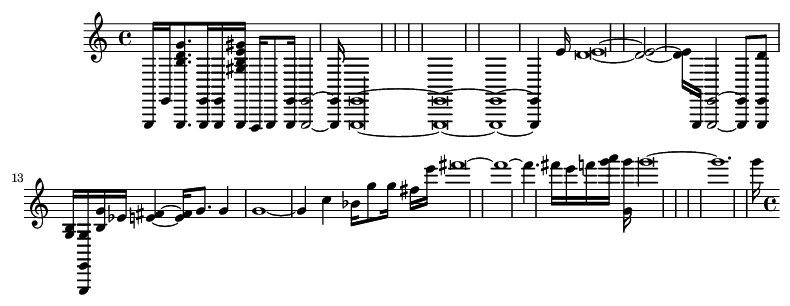

In [20]:
display_score(ns_only)

In [21]:
ns = str2stream(seed)
ns.show('midi')

### Testing

In [32]:
seed

'|| t0 nG#1 t16 nE2 t16 || t3 nB1 t12 nG#2 t4 || t3 nG#2 t4 nB2 t4 || t3 nG#2 t4 nB2 t4 nE3 t4 || t3 nB1 t16 nG#2 t4 nB2 t4 nE3 t4 || t3 nE3 t4 || t11 nG#1 t16 nB1 t16 nE2 t4 nG#3 t4 || t9 nB3 t2 || t5 nG#1 t16 nB1 t16 nE2 t16 || t7 nE4 t8 || t7 nG#1 t16 nB1 t16 nE2 t16 nE4 t16 || t15 nG#1 t4 nB1 t4 nE2 t4 nE4 t16 || t15 nG#2 t2 nE3 t2 nE4 t1 || t0 nD4 t1 || t0 nA2 t2 nE3 t2 nD4 t1 || t1 nB2 t1 nE3 t2 || t0 nB3 t1 || t0 nC3 t2 nE3 t2 nB3 t1 || t0 nA3 t1 || t0 nG#2 t2 nE3 t2 nE4 t1 || t0 nD4 t1 || t0 nA2 t2 || t0 nE3 t1 nC4 t16 || t0 nB2 t1 || t0 nB3 t1 || t0 nC3 t2 nB3 t46 || t0 nA3 t1 || t0 nC#3 t2 nA4 t1 || t0 nG4 t1 || t0 nD3 t2 nA3 t1 nG4 t2 || t0 nF4 t1 || t0 nE3 t2 nA3 t2 nF4 t1 || t0'

In [33]:
pred_only = pred_out.replace(seed, '').strip(); pred_only

'nG4 t1 || t0 nE3 t2 nG3 t2 nD4 t1 || t0 nG4 t1 || t0 nD3 t2 nB3 t1 || t0 nB4 t1 || t0 nD3 t2 nF3 t2 nC4 t1 || t0 nG4 t1 || t0 nF3 t2 nG3 t1 || t0 nA4 t1 || t0 nA3 t2 nF4 t1 || t0 nG4 t1 || t0 nE3 t2 nG3 t2 nC4 t1 || t0 nA4 t1 || t0 nG3 t2 nC4 t1 || t0 nA4 t1 || t0 nB3 t2 nG4 t1 || t0 nB4 t1 || t0 nD3 t2 nA3 t0 nC5 t4 || t0 nB4 t3 || t0 nA3 t2 nF4 t1 || t0 nF4 t1 || t0 nB3 t2 nG4 t1 nD5 t1 || t0 nA4 t1 || t0 nD4 t2 nC5 t1 || t0 nC5 t1 || t0 nB3 t2 nD4 t4 nD5 t2 || t1 nC4 t2 nD5 t1 || t0 nB4 t1 || t1 nB4 t1 || t0 nC4 t1 nA4 t1 || t0 nE5 t1 || t2 nC4 t2 nF5 t2 || t1 nD4 t1 nC5 t2 || t0 nB4 t1 || t0 nB3 t2 nC5 t8 || t0 nC4 t1 || t0 nD4 t1 nE5 t2 || t0 nG4 t1'

### Generate from predictions

In [34]:
str2seq(pred_only)

[[G4t1],
 [E3t2, G3t2, D4t1],
 [G4t1],
 [D3t2, B3t1],
 [B4t1],
 [D3t2, F3t2, C4t1],
 [G4t1],
 [F3t2, G3t1],
 [A4t1],
 [A3t2, F4t1],
 [G4t1],
 [E3t2, G3t2, C4t1],
 [A4t1],
 [G3t2, C4t1],
 [A4t1],
 [B3t2, G4t1],
 [B4t1],
 [D3t2, C5t4],
 [B4t3],
 [A3t2, F4t1],
 [F4t1],
 [B3t2, G4t1, D5t1],
 [A4t1],
 [D4t2, C5t1],
 [C5t1],
 [B3t2, D4t4, D5t2],
 [],
 [C4t2, D5t1],
 [B4t1],
 [],
 [B4t1],
 [C4t1, A4t1],
 [E5t1],
 [],
 [],
 [C4t2, F5t2],
 [],
 [D4t1, C5t2],
 [B4t1],
 [B3t2, C5t8],
 [C4t1],
 [D4t1, E5t2],
 [G4t1]]

In [35]:
note_stream = str2stream(pred_out)

In [36]:
from midi_data import *

In [37]:
print_stream_durations(note_stream)

4.0 0.25 <music21.chord.Chord G#1 E2>
3.0 1.25 <music21.chord.Chord B1 G#2>
1.0 2.25 <music21.chord.Chord G#2 B2>
1.0 3.25 <music21.chord.Chord G#2 B2 E3>
4.0 4.25 <music21.chord.Chord B1 G#2 B2 E3>
1.0 5.25 <music21.chord.Chord E3>
4.0 8.25 <music21.chord.Chord G#1 B1 E2 G#3>
0.5 10.75 <music21.chord.Chord B3>
4.0 12.25 <music21.chord.Chord G#1 B1 E2>
2.0 14.25 <music21.chord.Chord E4>
4.0 16.25 <music21.chord.Chord G#1 B1 E2 E4>
1.0 20.25 <music21.chord.Chord G#1 B1 E2 E4>
0.5 24.25 <music21.chord.Chord G#2 E3 E4>
0.25 24.5 <music21.chord.Chord D4>
0.5 24.75 <music21.chord.Chord A2 E3 D4>
0.25 25.25 <music21.chord.Chord B2 E3>
0.25 25.5 <music21.chord.Chord B3>
0.5 25.75 <music21.chord.Chord C3 E3 B3>
0.25 26.0 <music21.chord.Chord A3>
0.5 26.25 <music21.chord.Chord G#2 E3 E4>
0.25 26.5 <music21.chord.Chord D4>
0.5 26.75 <music21.chord.Chord A2>
0.25 27.0 <music21.chord.Chord E3 C4>
0.25 27.25 <music21.chord.Chord B2>
0.25 27.5 <music21.chord.Chord B3>
0.5 27.75 <music21.chord.Chord 

In [38]:
note_stream.show('text')

{0.0} <music21.stream.Part 0x7fd3b150df98>
    {0.0} <music21.instrument.Piano Piano>
    {0.0} <music21.tempo.MetronomeMark animato Quarter=120>
    {0.0} <music21.key.KeySignature of no sharps or flats>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.25} <music21.chord.Chord G#1 E2>
    {1.25} <music21.chord.Chord B1 G#2>
    {2.25} <music21.chord.Chord G#2 B2>
    {3.25} <music21.chord.Chord G#2 B2 E3>
    {4.25} <music21.chord.Chord B1 G#2 B2 E3>
    {5.25} <music21.chord.Chord E3>
    {8.25} <music21.chord.Chord G#1 B1 E2 G#3>
    {10.75} <music21.chord.Chord B3>
    {12.25} <music21.chord.Chord G#1 B1 E2>
    {14.25} <music21.chord.Chord E4>
    {16.25} <music21.chord.Chord G#1 B1 E2 E4>
    {20.25} <music21.chord.Chord G#1 B1 E2 E4>
    {24.25} <music21.chord.Chord G#2 E3 E4>
    {24.5} <music21.chord.Chord D4>
    {24.75} <music21.chord.Chord A2 E3 D4>
    {25.25} <music21.chord.Chord B2 E3>
    {25.5} <music21.chord.Chord B3>
    {25.75} <music21.chord.Chord C3 E3 B3>
    {

In [39]:
pred_format = pred_out.replace('xxbos ', '')

In [40]:
note_stream.show('midi')

In [39]:
Image(filename=str(note_stream.write('lily.png')))

LilyTranslateException: DurationException for durationObject <music21.duration.Duration 71.0>: Could not determine durationNumber from inexpressible